In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_path = 'hour_chicago.csv'
fig_size = (31, 9)

In [269]:
df = pd.read_csv(data_path)

In [270]:
df.info() # No nulls in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_str    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


In [271]:
df['date'] = pd.to_datetime( df['date_str'].astype('str') + ' ' + df['hr'].astype('str') + ':00:00', format = '%Y-%m-%d %H:%M:%S')

df.set_index(df['date'], drop = True, inplace = True)
df.drop(['date_str', 'date'], axis = 1, inplace = True) # Set the date as  the index of the dataframe and drop it as a parameter.

In [272]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
date,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


In [273]:
df_ts = df['cnt'].astype('float64') # Generate the time series taking the number of rented bikes every hour.

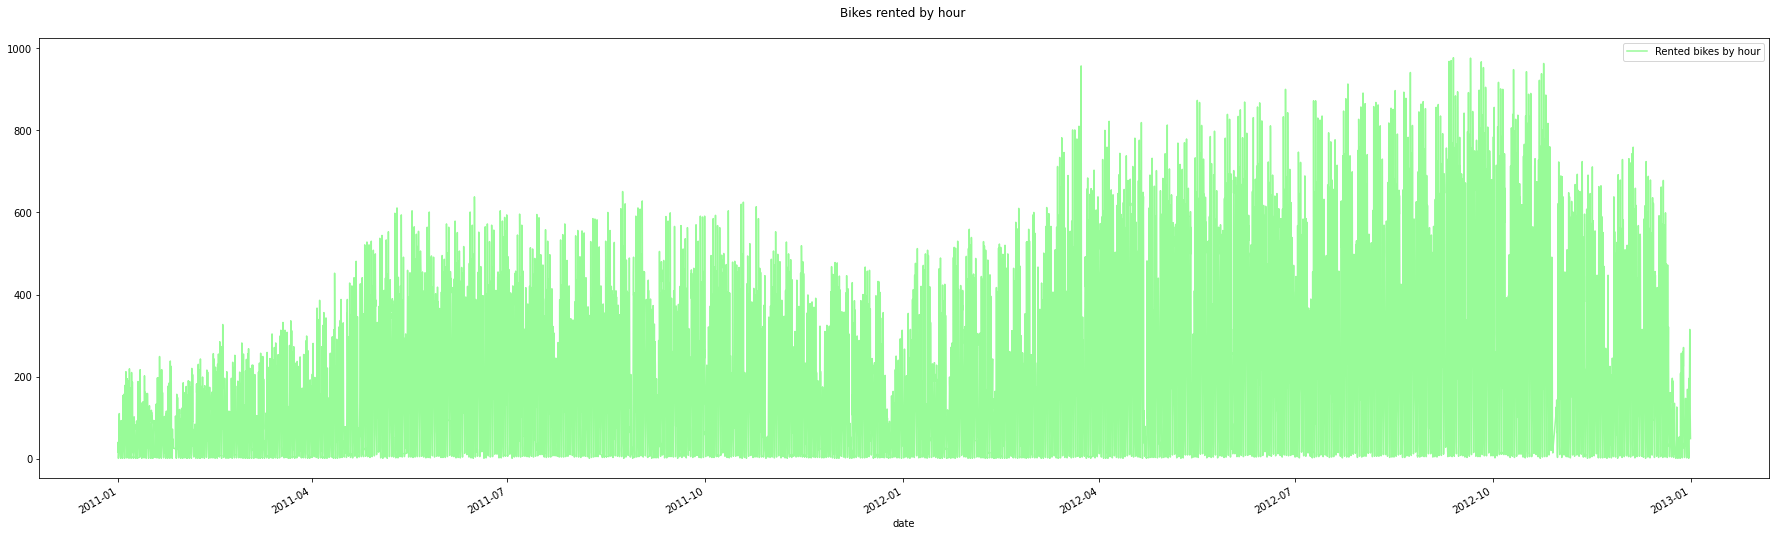

In [274]:
df_ts.plot(figsize = fig_size, title = 'Bikes rented by hour \n', color = 'palegreen', label = 'Rented bikes by hour', legend = True);

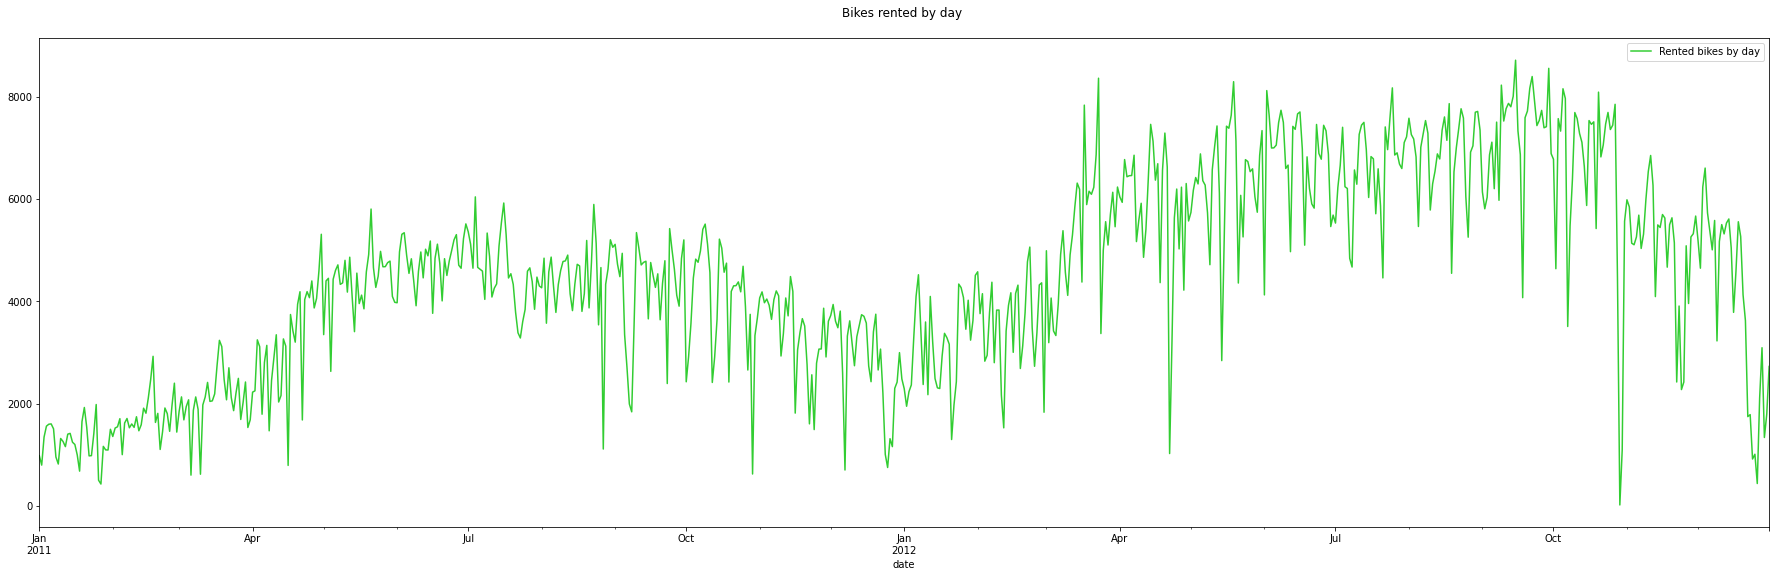

In [275]:
df_ts.resample('d').sum().plot(figsize = fig_size, title = 'Bikes rented by day \n', color = 'limegreen', label = 'Rented bikes by day', legend = True);

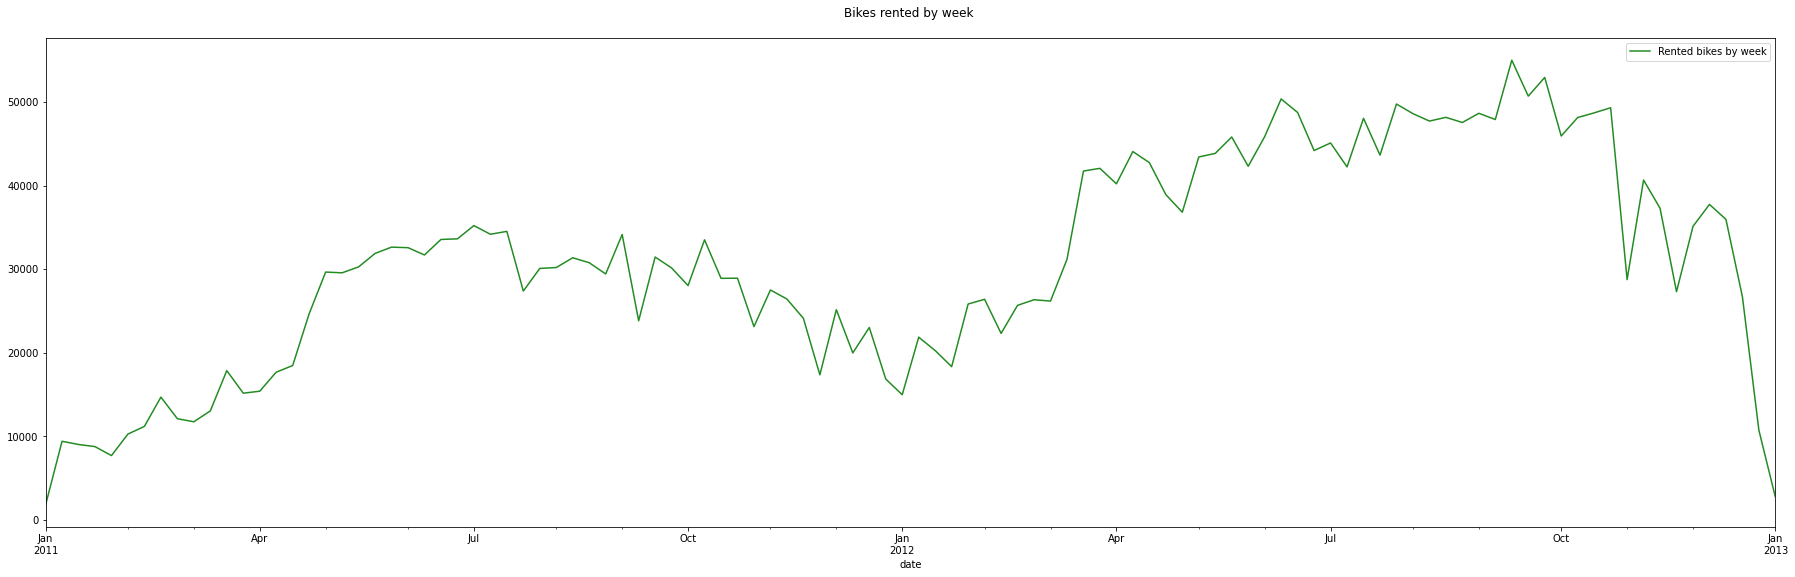

In [276]:
df_ts.resample('w').sum().plot(figsize = fig_size, title = 'Bikes rented by week \n', color = 'forestgreen', label = 'Rented bikes by week', legend = True);

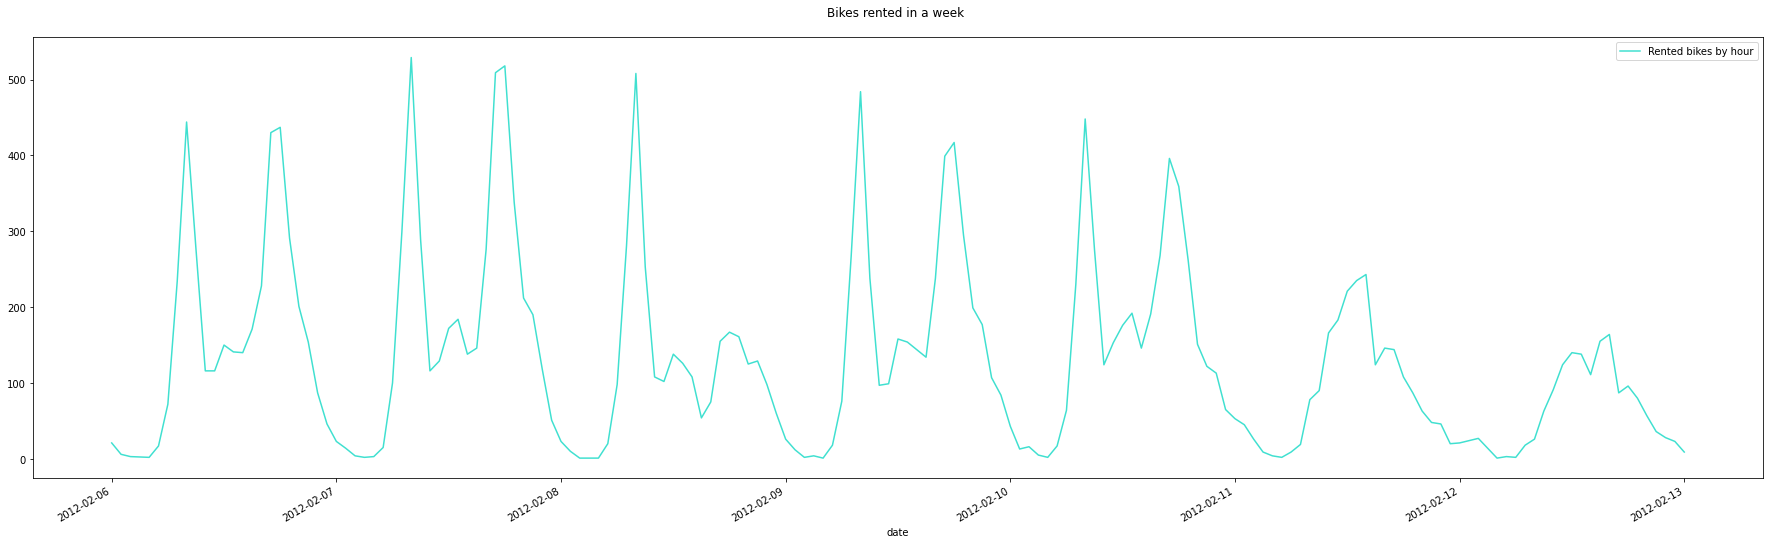

In [277]:
df_ts['2012-02-06 00:00:00':'2012-02-13 00:00:00'].plot(figsize = fig_size, title = 'Bikes rented in a week \n', color = 'turquoise', label = 'Rented bikes by hour', legend = True);

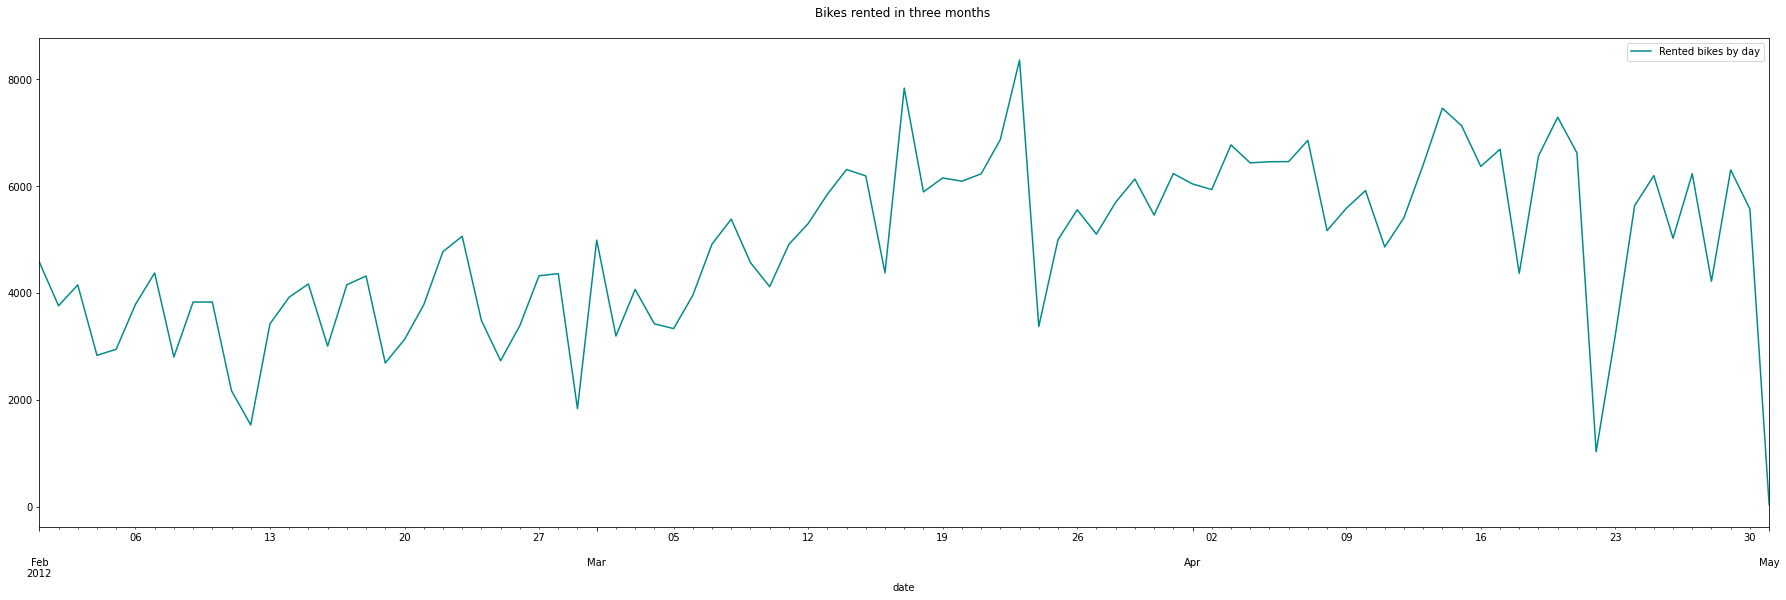

In [278]:
df_ts['2012-02-01 00:00:00':'2012-05-01 00:00:00'].resample('d').sum().plot(figsize = fig_size, title = 'Bikes rented in three months \n', color = 'darkcyan', label = 'Rented bikes by day', legend = True);

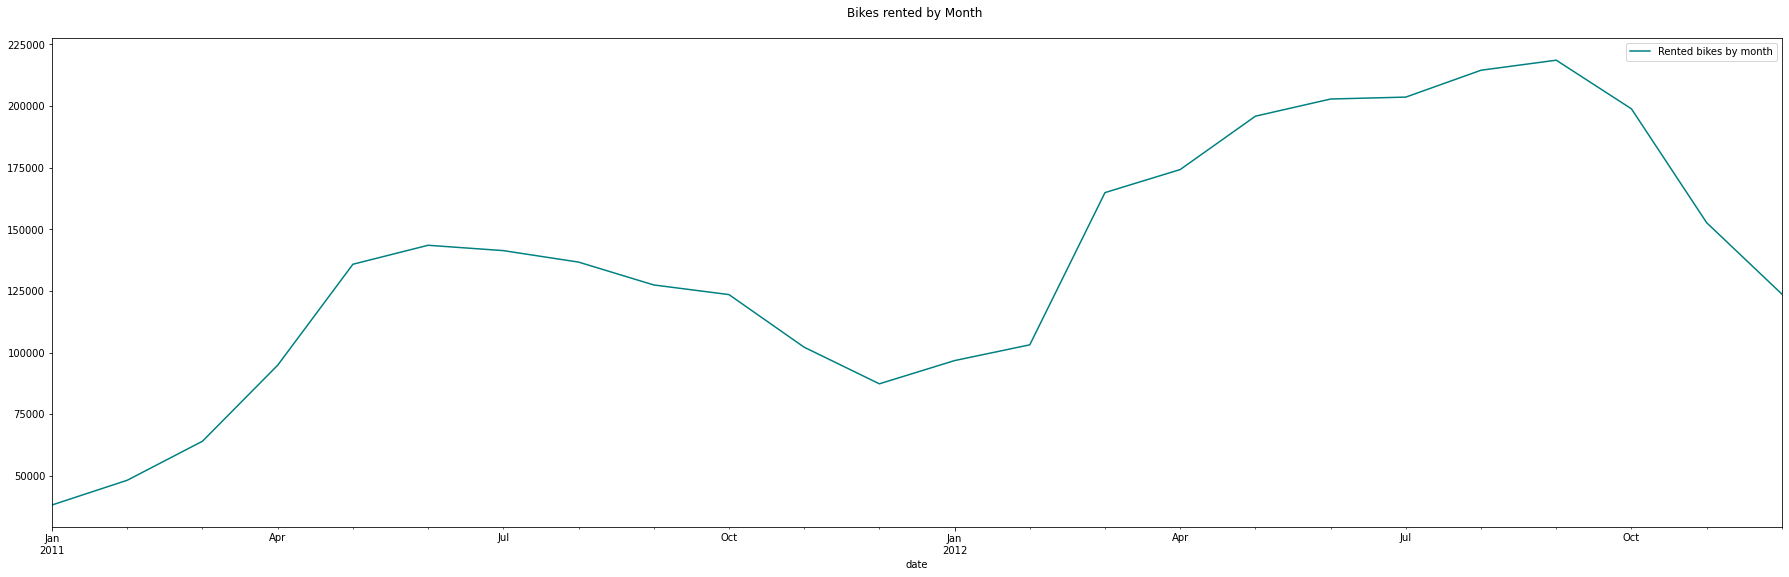

In [279]:
df_ts.resample('m').sum().plot(figsize = fig_size, title = 'Bikes rented by Month \n', color = 'teal', label = 'Rented bikes by month', legend = True);

## Components of the Time Series:

### Tendency:

* We can observe a positive tendency across the years.

### Stationality:

* We have periods of days and periods of weeks.

We proceed to eliminate the stational components of the Series:

In [280]:
df_ts = pd.concat([
    df_ts, 
    df_ts.copy().rolling(24).mean().rename('daily average')], 
    axis = 1)

In [281]:
df_ts

,cnt,daily average
date,,
2011-01-01 00:00:00,16.0,NaN
2011-01-01 01:00:00,40.0,NaN
2011-01-01 02:00:00,32.0,NaN
2011-01-01 03:00:00,13.0,NaN
2011-01-01 04:00:00,1.0,NaN
...,...,...
2012-12-31 19:00:00,119.0,110.166667
2012-12-31 20:00:00,89.0,110.875000
2012-12-31 21:00:00,90.0,112.666667


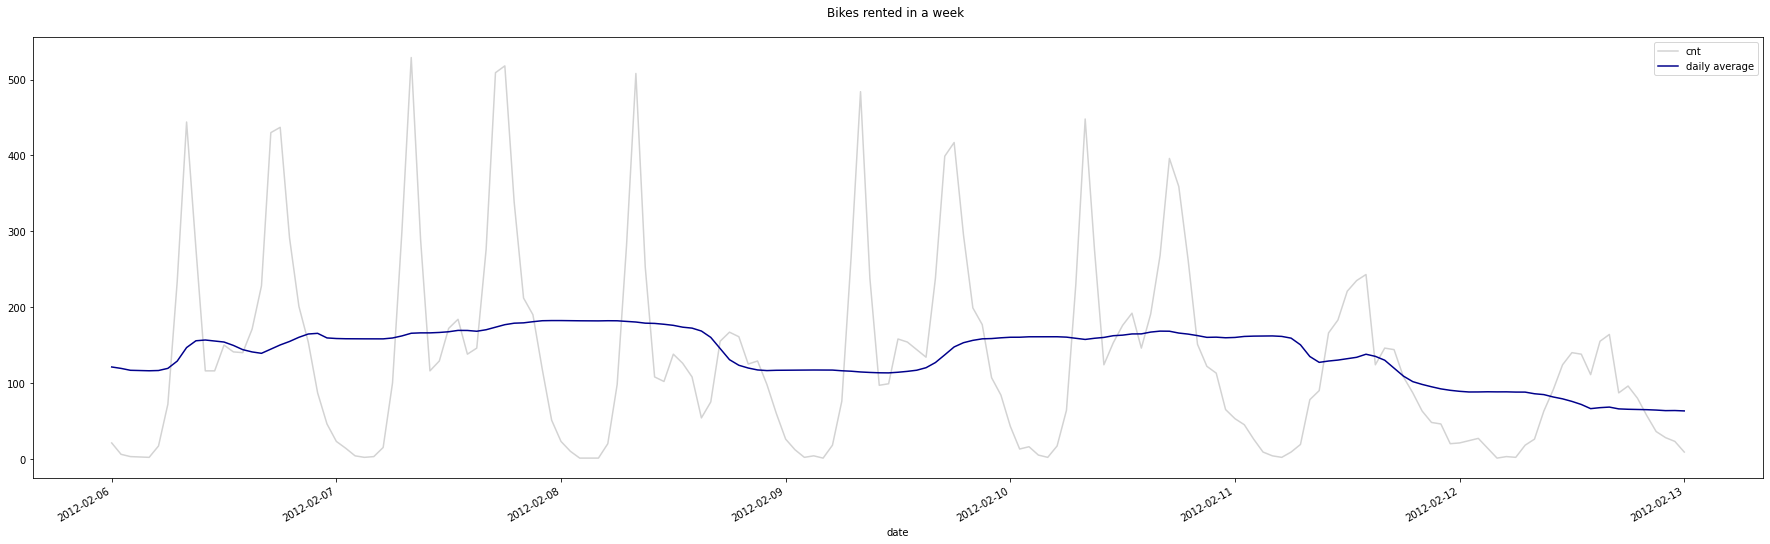

In [282]:
df_ts['2012-02-06 00:00:00':'2012-02-13 00:00:00'].\
    plot(figsize = fig_size, title = 'Bikes rented in a week \n', 
        color = ({'cnt':'lightgrey', 'daily average':'darkblue'}), 
        label = 'Rented bikes by hour', 
        legend = True);

In [283]:
df_ts = pd.concat([
    df_ts, 
    df_ts['daily average'].copy().rolling(7*24).mean().rename('weekly average')], 
    axis = 1)

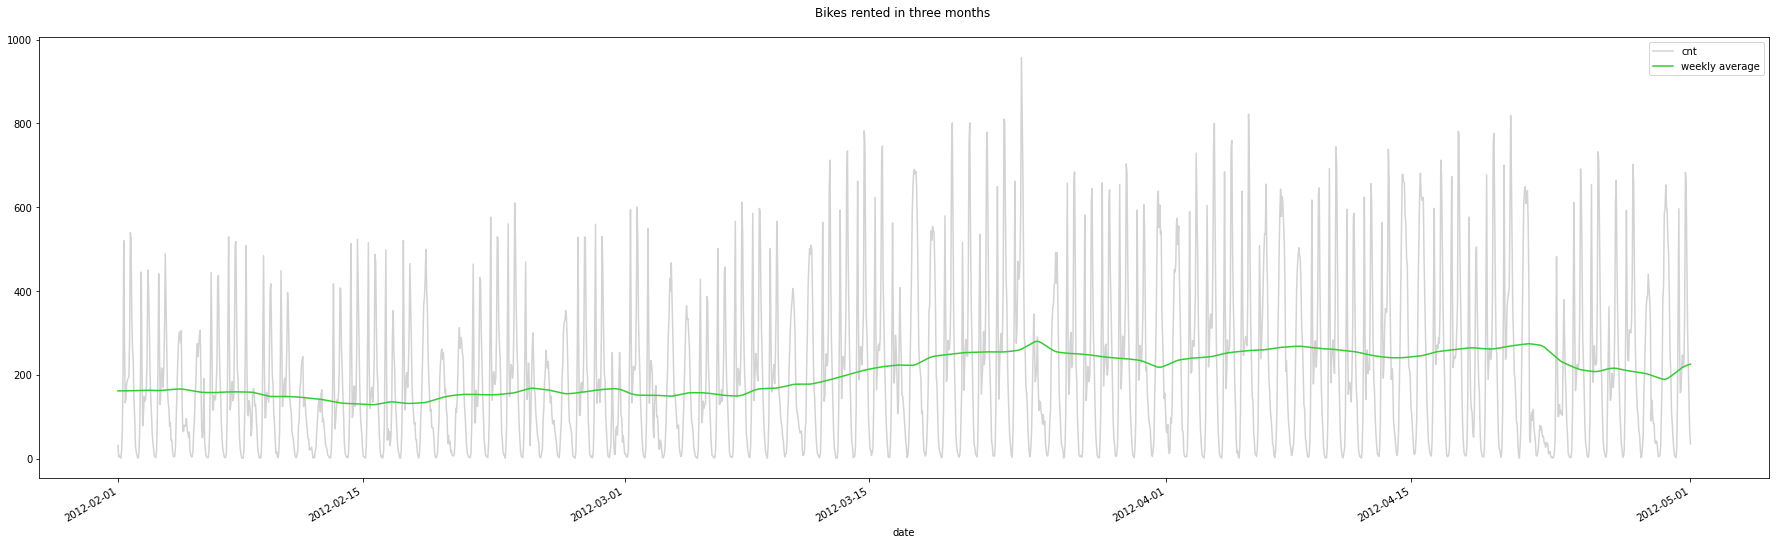

In [284]:
df_ts['2012-02-01 00:00:00':'2012-05-01 00:00:00'][['cnt', 'weekly average']].\
    plot(figsize = fig_size, 
        title = 'Bikes rented in three months \n', 
        color = {'cnt':'lightgrey', 'weekly average':'limegreen'},
        label = 'Rented bikes by day', 
        legend = True);

In [285]:
df_ts = pd.concat([df_ts, 
    df_ts['weekly average'].copy().rolling(24*7*4*12).mean().rename('tendency')],
    axis = 1)

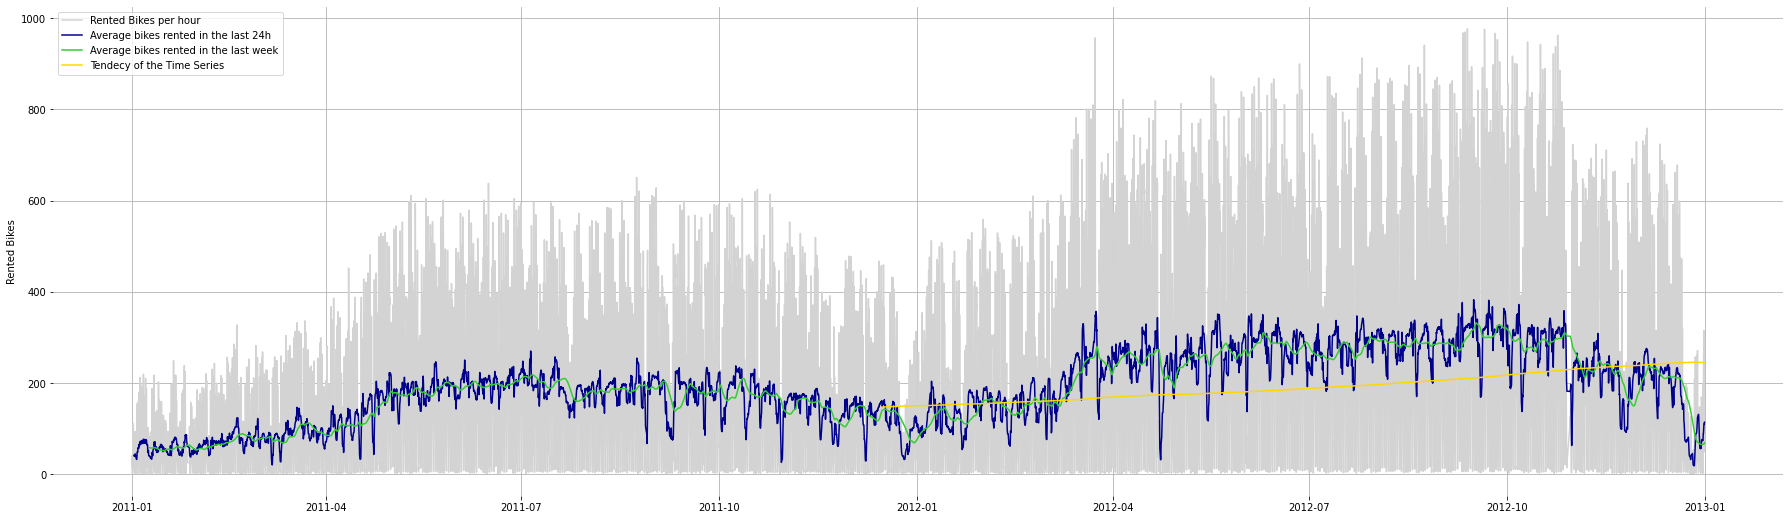

In [286]:
fig, ax = plt.subplots(figsize = fig_size)


ax.set_ylabel('Rented Bikes')

ax.plot(df_ts['cnt'], color = 'lightgrey', label='Rented Bikes per hour')
ax.plot(df_ts['daily average'], color = 'darkblue', label = 'Average bikes rented in the last 24h')
ax.plot(df_ts['weekly average'], color = 'limegreen', label = 'Average bikes rented in the last week')
ax.plot(df_ts['tendency'], color = 'gold', label = 'Tendecy of the Time Series')

[ ax.spines[x].set_visible(False) for x in ['top', 'right', 'left', 'bottom'] ]
ax.grid()
ax.legend();

In [287]:
df_ts['stationality coefs'] = df_ts['cnt'] / df_ts['weekly average']

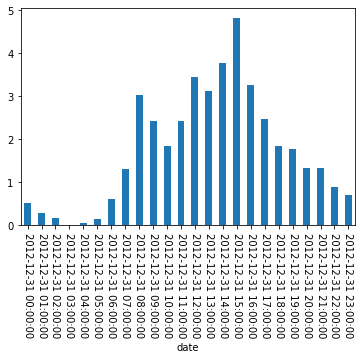

In [288]:
df_ts['stationality coefs'].iloc[-24:].plot.bar(rot = 270); # Stational coeficients of the last day.

In [289]:
df_ts['residue'] = df_ts['tendency'] - df_ts['tendency'].shift(1)

In [290]:
df_ts

,cnt,daily average,weekly average,tendency,stationality coefs,residue
date,,,,,,
2011-01-01 00:00:00,16.0,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,40.0,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,32.0,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,13.0,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2012-12-31 19:00:00,119.0,110.166667,66.667163,244.477653,1.784987,-0.008471
2012-12-31 20:00:00,89.0,110.875000,67.057540,244.469146,1.327218,-0.008507
2012-12-31 21:00:00,90.0,112.666667,67.467262,244.460605,1.333980,-0.008540


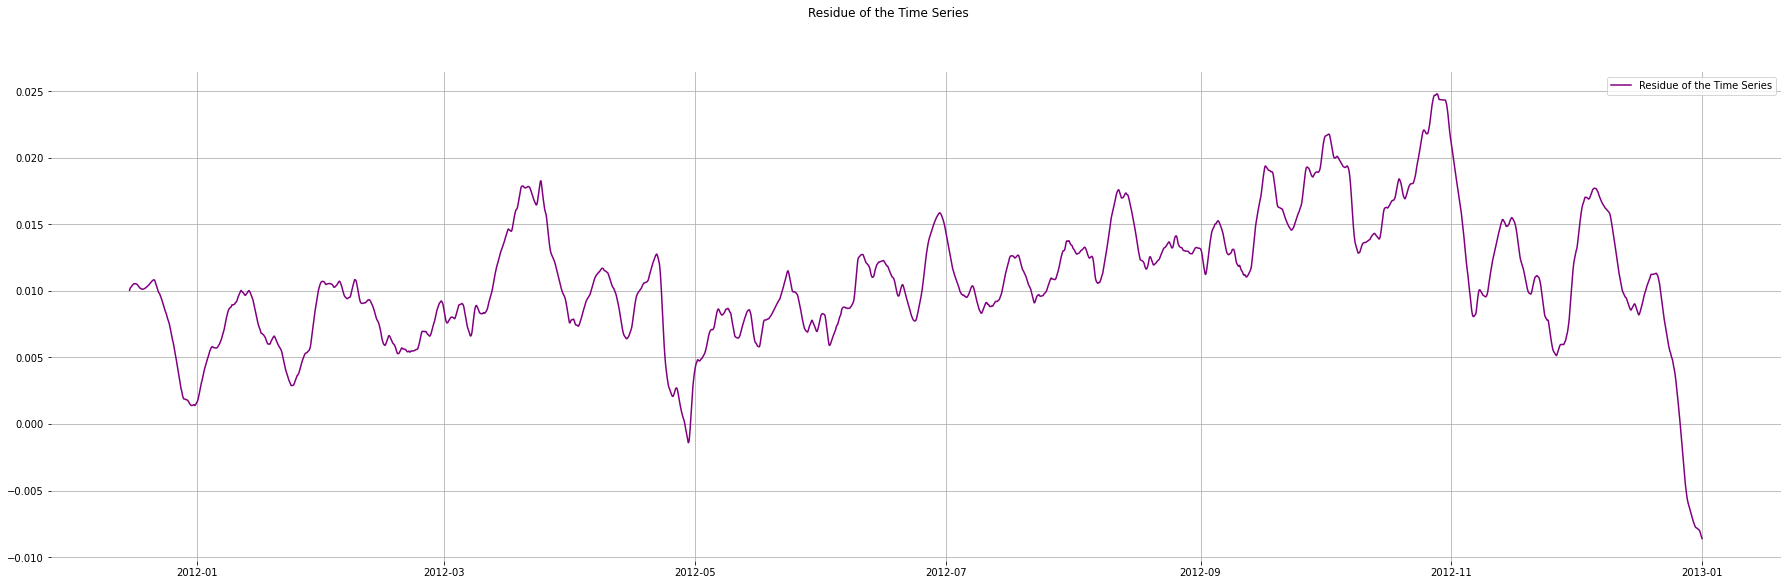

In [349]:
fig, ax = plt.subplots(figsize = fig_size)

fig.suptitle('Residue of the Time Series')
# ax.set_ylabel('Residue')

# ax.plot(df_ts['cnt'], color = 'lightgrey', label='Rented Bikes per hour')
ax.plot(df_ts['residue'], color = 'purple', label='Residue of the Time Series')


[ ax.spines[x].set_visible(False) for x in ['top', 'right', 'left', 'bottom'] ]
ax.grid()
ax.legend();

## Previson:

Now we will make a prediction of the number of bikes rented the next months:

In [350]:
df_ts_prediction = pd.DataFrame({'cnt':[np.nan]}, index = pd.date_range('2013-01-01 00:00:00', periods = 59*24, freq = 'h'))
df_ts_prediction[[df_ts.columns]] = np.nan

df_ts_prediction = pd.concat([df_ts, df_ts_prediction], axis = 0, ignore_index = False)
df_ts_prediction['residue_prediction'] = np.nan


In [351]:
df_ts_prediction['residue_prediction'].loc['2012-12-31 23:00:00'] = df_ts_prediction['residue'].loc['2012-12-31 23:00:00']
df_ts_prediction['residue_prediction'].loc['2013-01-01 00:00:00':] = df_ts_prediction['residue'].mean()

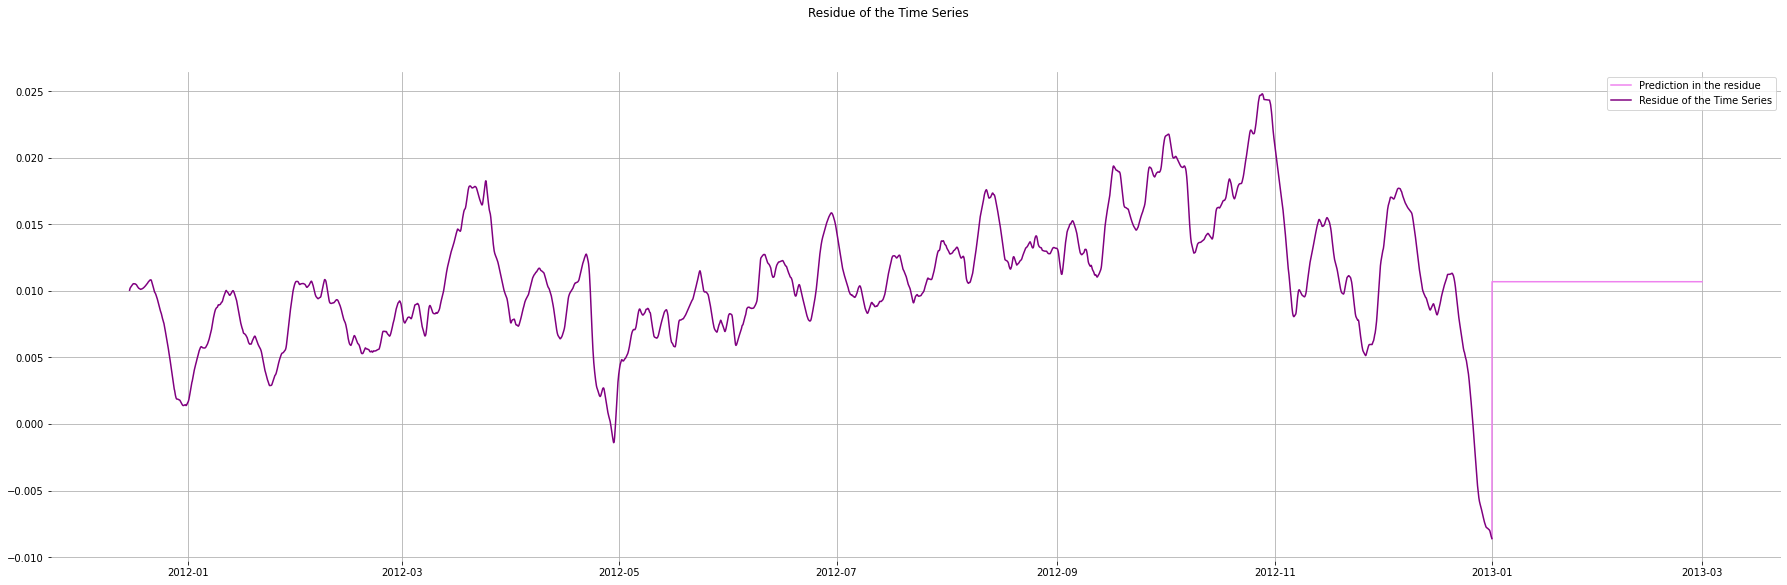

In [352]:
fig, ax = plt.subplots(figsize = fig_size)

fig.suptitle('Residue of the Time Series')
# ax.set_ylabel('Residue')

ax.plot(df_ts_prediction['residue_prediction'], color = 'violet', label='Prediction in the residue')
ax.plot(df_ts_prediction['residue'], color = 'purple', label='Residue of the Time Series')


[ ax.spines[x].set_visible(False) for x in ['top', 'right', 'left', 'bottom'] ]
ax.grid()
ax.legend();

In [353]:
df_ts_prediction['tendency_prediction'] = np.nan
df_ts_prediction['tendency_prediction'].loc['2012-12-31 23:00:00':] = df_ts_prediction['tendency'].loc['2012-12-31 23:00:00']
df_ts_prediction['add_tendency_prediction'] = df_ts_prediction['tendency_prediction'] + df_ts_prediction['residue_prediction'].cumsum()

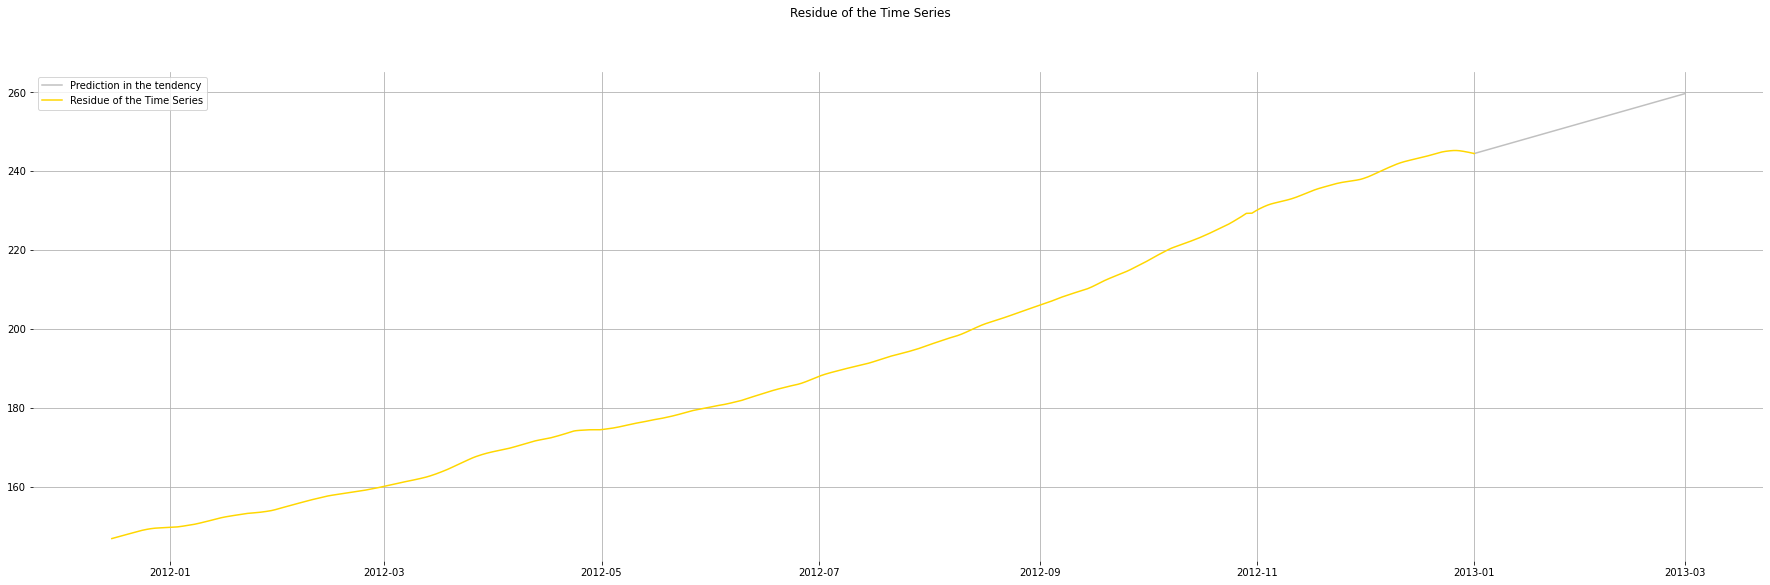

In [354]:
fig, ax = plt.subplots(figsize = fig_size)

fig.suptitle('Residue of the Time Series')
# ax.set_ylabel('Residue')

ax.plot(df_ts_prediction['add_tendency_prediction'], color = 'silver', label='Prediction in the tendency')
ax.plot(df_ts_prediction['tendency'], color = 'gold', label='Residue of the Time Series')


[ ax.spines[x].set_visible(False) for x in ['top', 'right', 'left', 'bottom'] ]
ax.grid()
ax.legend();

In [355]:
df_ts_prediction['forecast'] = np.nan

df_ts_prediction['forecast'] = df_ts_prediction['add_tendency_prediction'] * df_ts_prediction['stationality coefs'].shift(59*24)

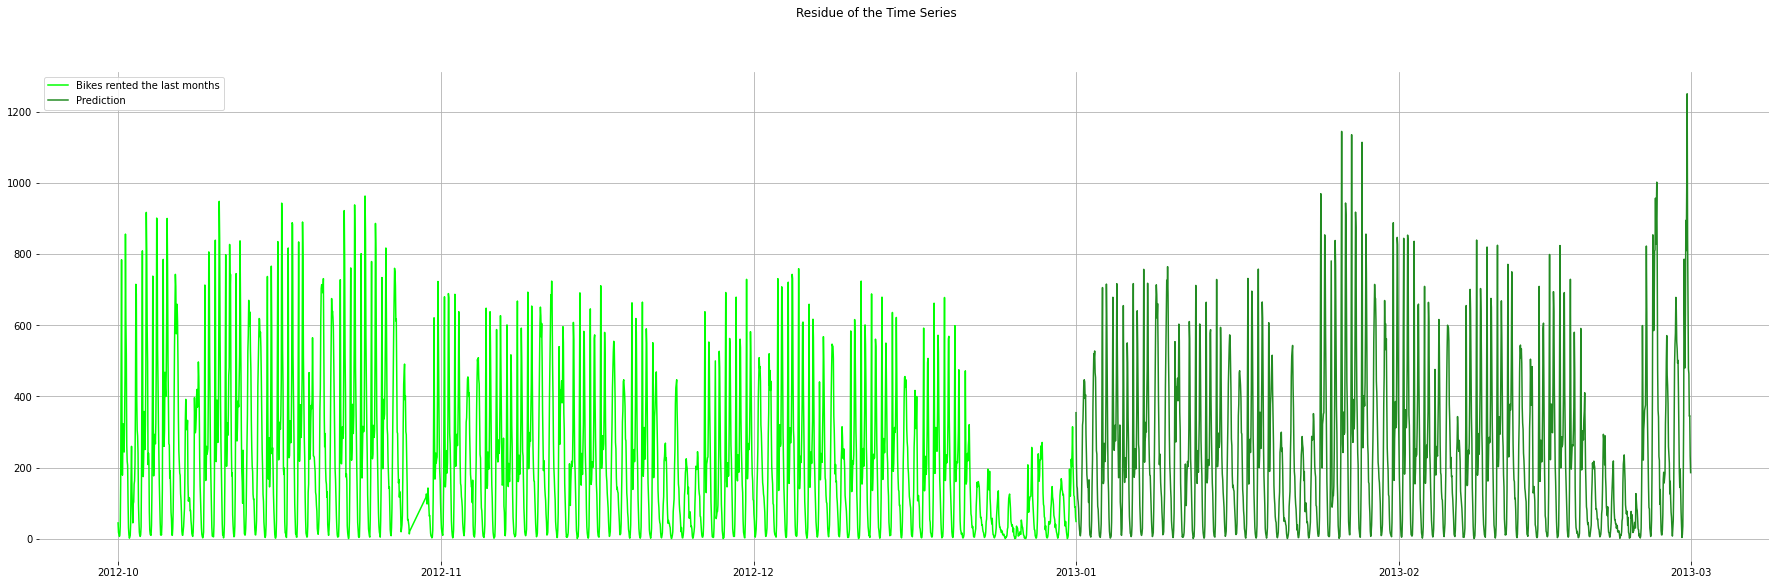

In [357]:
fig, ax = plt.subplots(figsize = fig_size)

fig.suptitle('Residue of the Time Series')
# ax.set_ylabel('Residue')

ax.plot(df_ts_prediction['cnt'].loc['2012-10-01 00:00:00':'2012-12-31 23:00:00'], color = 'lime', label='Bikes rented the last months')
ax.plot(df_ts_prediction['forecast'].loc['2012-12-01 00:00:00':], color = 'forestgreen', label='Prediction')


[ ax.spines[x].set_visible(False) for x in ['top', 'right', 'left', 'bottom'] ]
ax.grid()
ax.legend();